# Intro to Neural Networks Assignment

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: The layer receives input for the dataset. Might be referred to as the visible layer bcause it's the only part that interacts with the data and is exposed to it.
### Hidden Layer(s): The layers that come after the input layer but before the output layer. Hidden layers cannot be accessed except through the input layer and are not interacted with
### Output Layer: This is the final layer. The output layer provides a vector of values. Usually it's modified by an activation function to put it into a format that works for our context. 
### Neuron:  A basic unit of computation in a neural network. Called a node or unit. It receives input from some other nodes or external sources.
### Weight: A value based on the relative importance as compared to the other inputs
### Activation Function: The activation function introduces non-linearity into the output. Most of our lives are not linear. Therefore, an activation function takes an output value and performs a mathematical operation on it.
### Node Map: A pictorial representation of our input, weights, hidden layers, output layers, bias, etc.
### Perceptron: A linear classifier (binary) that helps classify the input data. All inputs are mulitplied by their weights. Add all the multiplied values and call them the weighted sum. Apply the weighted sum to the activation function. This is used to classify the data into binary parts.
### Bias: Similar to the intercept in a linear equation. It's an additional parameter used to adjust the output along with the weighted sums from the input. Bias is a constant that helps the model find the best fit for the data.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

The flow can happen in one of two ways. The first is when the network is being trained. The second is after being trained. Information is fed into the network by the input units. There is also a bias to help the model find the best fit for the data. Those input units are multiplied by their weights according to importance then activate the hidden units and layers in the network. Each layer of hidden units is receiving input from the layer to the left and those inputs are multiplied by the weights of the connections. The weight of each unit is gradually adjusted as the connection between any two units changes. The activation function produces the output of any node eventually producing a final output layer.

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [308]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [235]:

inputs = np.array([[1., 0., 0.],
    [1., 1., 0.],
    [1., 0., 1.],
    [1., 1., 1.]])

# Ideal outputs
correct_outputs = [[1.],
    [1.],
    [1.],
   [0.]]

In [236]:
correct_outputs

[[1.0], [1.0], [1.0], [0.0]]

In [237]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [238]:
# Random weights
weights = 2 * np.random.random((3,1))-1
weights

array([[-0.32144264],
       [ 0.50240377],
       [ 0.57857019]])

In [239]:
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[-0.32144264],
       [ 0.18096113],
       [ 0.25712755],
       [ 0.75953132]])

In [240]:
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.42032421],
       [0.54511723],
       [0.56393005],
       [0.68125197]])

In [241]:
error = correct_outputs - activated_output
error

array([[ 0.57967579],
       [ 0.45488277],
       [ 0.43606995],
       [-0.68125197]])

In [242]:
adjustments = error * sigmoid_derivative(activated_output)  # Gradient Descent
adjustments

array([[ 0.13870202],
       [ 0.10567403],
       [ 0.10078965],
       [-0.151986  ]])

In [243]:
weights += np.dot(inputs.T, adjustments)
weights

array([[-0.12826294],
       [ 0.45609179],
       [ 0.52737384]])

In [247]:
for iteration in range(500):
  
  # Weighted sum of inputs and weights
  weighted_sum = np.dot(inputs, weights)
  
  # Activate with sigmoid function
  activated_output = sigmoid(weighted_sum)
  
  # Calculate Error
  error = correct_outputs - activated_output
  
  # Calculate weight adjustments with sigmoid_derivative
  adjustments = error * sigmoid_derivative(activated_output)
  
  # Update weights
  weights += np.dot(inputs.T, adjustments)
  
print('Optimized weights after training: ')
print(weights)

print("Output After Training:")
print(activated_output)

Optimized weights after training: 
[[ 9.90392914]
 [-6.56346082]
 [-6.56346069]]
Output After Training:
[[0.99994982]
 [0.96574642]
 [0.96574642]
 [0.03836076]]


## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [258]:
titanic = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv')
titanic.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [259]:
titanic.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [260]:
titanic = titanic.dropna()
titanic.isnull().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

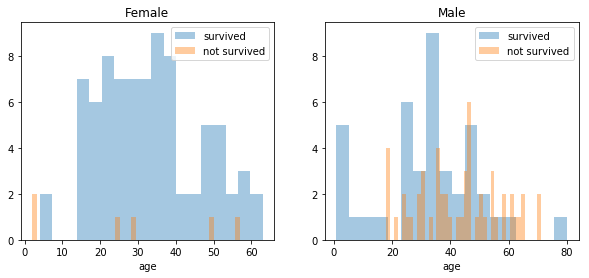

In [264]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [266]:
# FacetGrid = sns.FacetGrid(titanic, row='embarked', size=4.5, aspect=1.6)
# FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None,  order=None, hue_order=None )
# FacetGrid.add_legend()

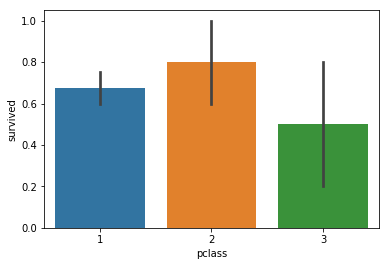

In [267]:
sns.barplot(x='pclass', y='survived', data=titanic)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


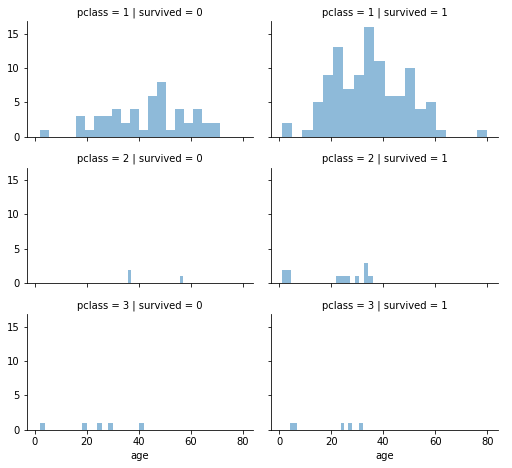

In [269]:
grid = sns.FacetGrid(titanic, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

The plot above confirms the assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive

In [292]:
inputs.sex = titanic.sex.replace({'male': 0, 'female': 1})
inputs.head()

,age,sex
1,38.0,1
3,35.0,1
6,54.0,0
10,4.0,1
11,58.0,1


In [310]:
# Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(inputs, y, test_size=0.2, random_state=42)

# Confirming correct shapes of data
print("X_train shape is: ", (X_train.shape))
print("X_test shape is: ",(X_test.shape))
print("y_train shape is: ",(y_train.shape))
print("y_trest shape is: ",(y_test.shape))

X_train shape is:  (145, 2)
X_test shape is:  (37, 2)
y_train shape is:  (145,)
y_trest shape is:  (37,)


/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


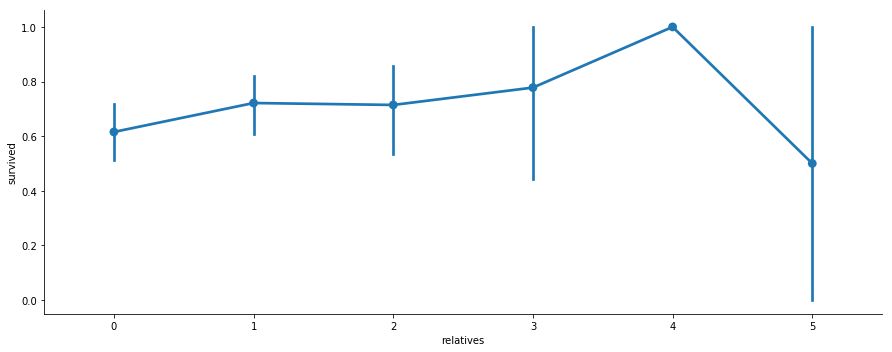

In [311]:
titanic['relatives'] = titanic['sibsp'] + titanic['parch']
axes = sns.factorplot('relatives','survived', 
                      data=titanic, aspect = 2.5, )

In [317]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


31.72

In [313]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

92.41

In [322]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


77.24

In [323]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


68.28

In [315]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

84.14

In [316]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

77.24

In [319]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


77.24

In [320]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

92.41

In [321]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.41,Random Forest
92.41,Decision Tree
84.14,KNN
77.24,Support Vector Machines
77.24,Naive Bayes
76.37,Logistic Regression
68.28,Stochastic Gradient Decent
31.72,Perceptron


In [324]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.66666667 0.8        0.73333333 0.73333333 0.66666667
 0.71428571 1.         0.71428571 0.69230769]
Mean: 0.752087912087912
Standard Deviation: 0.09369112735505063


In [325]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.41 %


In [326]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
clf.bestparams

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [ ]:
x = titanic[['age', 'sex', 'class', 'deck']]
x.head()

In [144]:
# inputs['dummies'] = 1
# inputs.head()

In [254]:
X = np.array(inputs)
correct_output = titanic['survived']
y = np.array(correct_output)

In [255]:
weights = 2 * np.random.random((2,1)) - 1
weights

array([[ 0.45484755],
       [-0.38065025]])

In [256]:
weighted_sum = np.dot(X, weights)
weighted_sum

array([[16.90355671],
       [15.53901406],
       [24.56176779],
       [ 1.43873995],
       [26.00050775],
       [15.46481676],
       [12.73573145],
       [ 8.64210348],
       [21.90687978],
       [29.56509086],
       [20.46813983],
       [12.80992875],
       [11.37118879],
       [10.08084344],
       [20.92298738],
       [32.29417617],
       [10.46149369],
       [ 9.55179859],
       [21.37783493],
       [10.91634124],
       [14.40189518],
       [24.56176779],
       [ 8.26145323],
       [16.82935941],
       [10.91634124],
       [16.60193564],
       [ 9.62599588],
       [27.74570066],
       [25.4714629 ],
       [22.36172733],
       [ 0.45484755],
       [ 1.36454266],
       [19.63264202],
       [26.00050775],
       [ 0.52904485],
       [18.19390207],
       [13.71962385],
       [14.1744714 ],
       [17.28420697],
       [15.53901406],
       [20.01329228],
       [16.82935941],
       [12.80992875],
       [28.20054821],
       [13.2647763 ],
       [23

In [232]:
activated_output = sigmoid(weighted_sum)
activated_output

array([[1.        ],
       [1.        ],
       [1.        ],
       [0.95717628],
       [1.        ],
       [1.        ],
       [0.99999999],
       [0.99999693],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999994],
       [0.99999986],
       [1.        ],
       [1.        ],
       [0.99999979],
       [0.99999919],
       [1.        ],
       [0.99999989],
       [1.        ],
       [1.        ],
       [0.99999801],
       [1.        ],
       [0.99999989],
       [1.        ],
       [0.99999973],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.66109505],
       [0.88127229],
       [1.        ],
       [1.        ],
       [0.85452476],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.   

In [231]:
error = correct_outputs - activated_output
error

ValueError: operands could not be broadcast together with shapes (4,1) (182,1) 

In [198]:
adjustments = error * sigmoid_derivative(activated_output) ### Gradient Descent / Backpropagation Magic
adjustments

array([[ 0.08372835],
       [ 0.0939349 ],
       [ 0.05809333],
       [-0.15530725]])

In [199]:
weights += np.dot(inputs.T, adjustments)
weights

array([[ 0.61552428],
       [-0.23025427],
       [ 0.38693467]])

In [200]:
for iteration in range(10000):
  
  # Weighted sum of inputs and weights
  weighted_sum = np.dot(X, weights)
  
  # Activate with sigmoid function
  activated_output = sigmoid(weighted_sum)
  
  # Calculate Error
  error = correct_outputs - activated_output
  
  # Calculate weight adjustments with sigmoid_derivative
  adjustments = error * sigmoid_derivative(activated_output)
  
  # Update weights
  weights += np.dot(inputs.T, adjustments)
  
print('Optimized weights after training: ')
print(weights)

print("Output After Training:")
print(activated_output)

Optimized weights after training: 
[[ 17.80860796]
 [-11.83982893]
 [-11.83982893]]
Output After Training:
[[0.99999998]
 [0.99744891]
 [0.99744891]
 [0.00281226]]


In [161]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

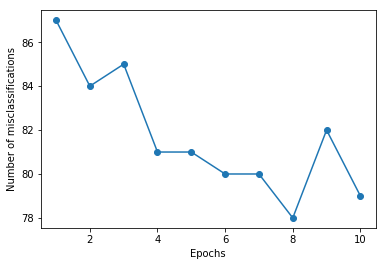

In [162]:
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [163]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
    alpha=0.8, c=cmap(idx),
    marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


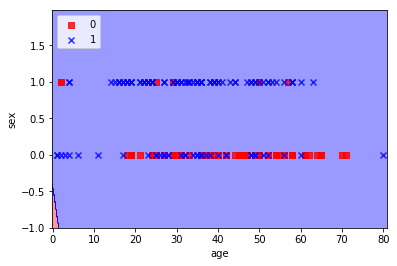

In [268]:
plot_decision_regions(X, y, classifier=pn)
plt.xlabel('age')
plt.ylabel('sex')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?